In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("EDA_Practice_Dataset_1_Bestseller_with_Categoriestopic_added1621240676s_p2076906743.csv")

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [10]:
df.shape

(550, 7)

In [15]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

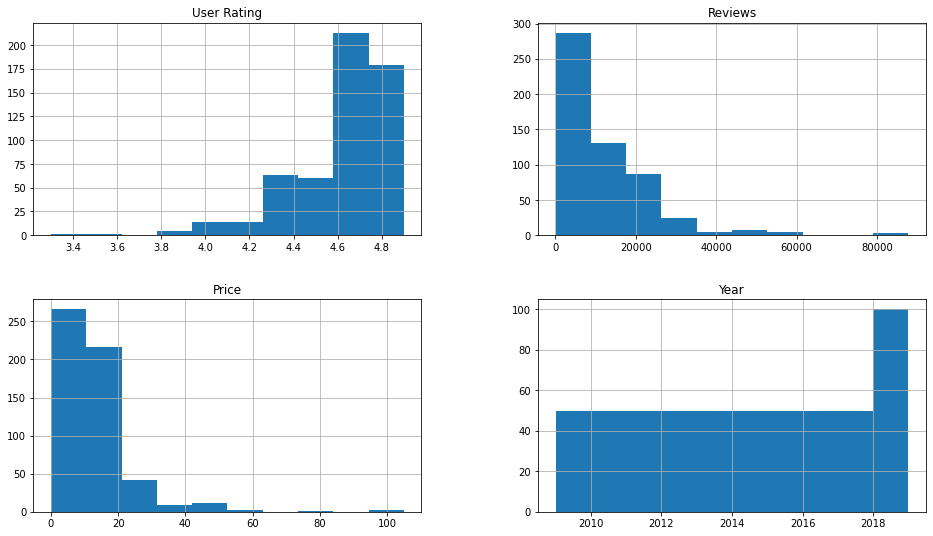

In [18]:
df.hist(figsize=(16,9));

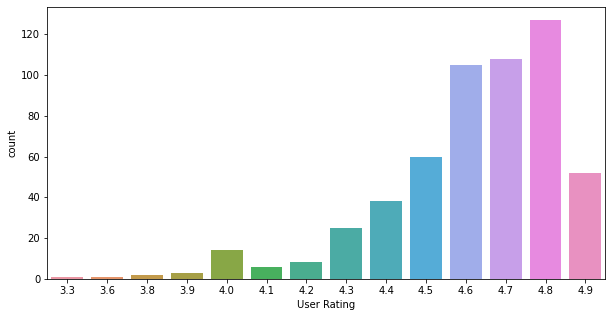

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x="User Rating",data=df);

Observations: 
4.8 User rating have maximum count of ratings.

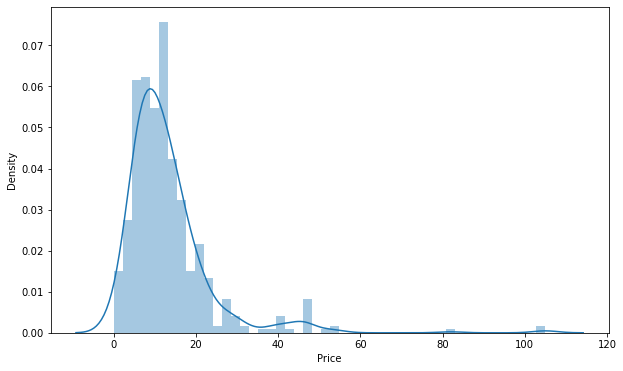

In [39]:
plt.figure(figsize=(10,6))
sns.distplot(df["Price"]);

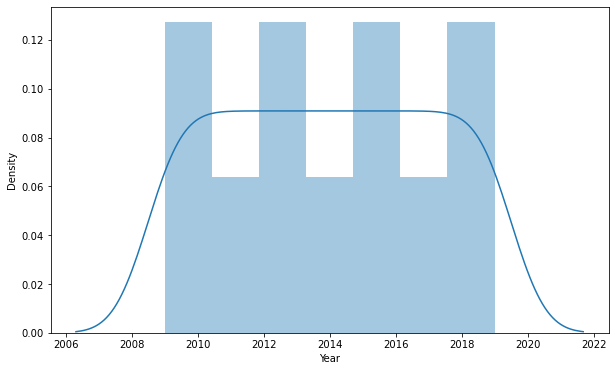

In [40]:
plt.figure(figsize=(10,6))
sns.distplot(df["Year"]);

In [60]:
df.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [61]:
df.Genre.value_counts().index

Index(['Non Fiction', 'Fiction'], dtype='object')

In [62]:
df.Genre.value_counts().values

array([310, 240], dtype=int64)

In [66]:
df_index=df.Genre.value_counts().index

In [67]:
df_values=df.Genre.value_counts().values

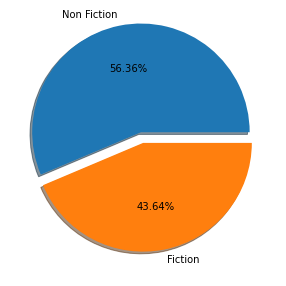

In [76]:
plt.figure(figsize=(10,5))
plt.pie(df_values,labels=df_index,autopct="%1.2f%%",explode=[0.1,0],shadow=True);

observations:-->  Non fiction novels are 56.36% and Fiction novels are 43.64%.

In [105]:
df.groupby(["Genre","User Rating"]).size()

Genre        User Rating
Fiction      3.3             1
             3.6             1
             3.8             2
             3.9             3
             4.0             5
             4.1             4
             4.2             3
             4.3            11
             4.4            10
             4.5            18
             4.6            31
             4.7            34
             4.8            76
             4.9            41
Non Fiction  4.0             9
             4.1             2
             4.2             5
             4.3            14
             4.4            28
             4.5            42
             4.6            74
             4.7            74
             4.8            51
             4.9            11
dtype: int64

In [106]:
df.groupby(["Genre","User Rating"]).size().reset_index()

,Genre,User Rating,0
0,Fiction,3.3,1
1,Fiction,3.6,1
2,Fiction,3.8,2
3,Fiction,3.9,3
4,Fiction,4.0,5
5,Fiction,4.1,4
6,Fiction,4.2,3
7,Fiction,4.3,11
8,Fiction,4.4,10
9,Fiction,4.5,18


In [108]:
ratings=df.groupby(["Genre","User Rating"]).size().reset_index().rename(columns={0:"rating_count"})

In [109]:
ratings

,Genre,User Rating,rating_count
0,Fiction,3.3,1
1,Fiction,3.6,1
2,Fiction,3.8,2
3,Fiction,3.9,3
4,Fiction,4.0,5
5,Fiction,4.1,4
6,Fiction,4.2,3
7,Fiction,4.3,11
8,Fiction,4.4,10
9,Fiction,4.5,18


In [117]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [119]:
df.groupby(["Price","User Rating","Genre"]).size()

Price  User Rating  Genre      
0      4.6          Fiction        2
       4.7          Fiction        1
       4.8          Fiction        7
                    Non Fiction    1
       4.9          Fiction        1
                                  ..
52     4.8          Fiction        1
53     4.7          Non Fiction    1
54     4.9          Non Fiction    1
82     4.7          Fiction        1
105    4.5          Non Fiction    2
Length: 214, dtype: int64